In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import re

import scarches
from scarches.models.scpoli import scPoli

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

 captum (see https://github.com/pytorch/captum).
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scarches.__version__

'0.5.7'

In [3]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
adata_latent = sc.read('../../fetal_lung/Roche/new_20230705/adata_latent_source.h5ad')

In [5]:
adata_latent

AnnData object with n_obs × n_vars = 806646 × 10
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden'
    obsm: 'X_umap'

In [6]:
# map colors
col_map = pd.read_table('gut_scpoli_color.txt', header=None, index_col=0)
col_map = dict(zip(col_map.index, col_map[1]))

In [7]:
adata_latent[adata_latent.obs.publication.isin(['Chan_NatCommun_2022'])].obs.sample_id.value_counts()

sample_id
Chan_NatCommun_2022_bronchial_organoids         4073
Chan_NatCommun_2022_nasopharyngeal_organoids    3576
Name: count, dtype: int64

In [8]:
adata_latent.uns['level_1_colors'] = adata_latent.obs.level_1.cat.categories.map(col_map).tolist()
adata_latent.uns['level_2_colors'] = adata_latent.obs.level_2.cat.categories.map(col_map).tolist()
adata_latent.uns['level_3_colors'] = adata_latent.obs.level_3.cat.categories.map(col_map).tolist()
adata_latent.uns['tissue_colors'] = adata_latent.obs.tissue.cat.categories.map(col_map).tolist()
adata_latent.uns['derive_colors'] = adata_latent.obs.derive.cat.categories.map(col_map).tolist()

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


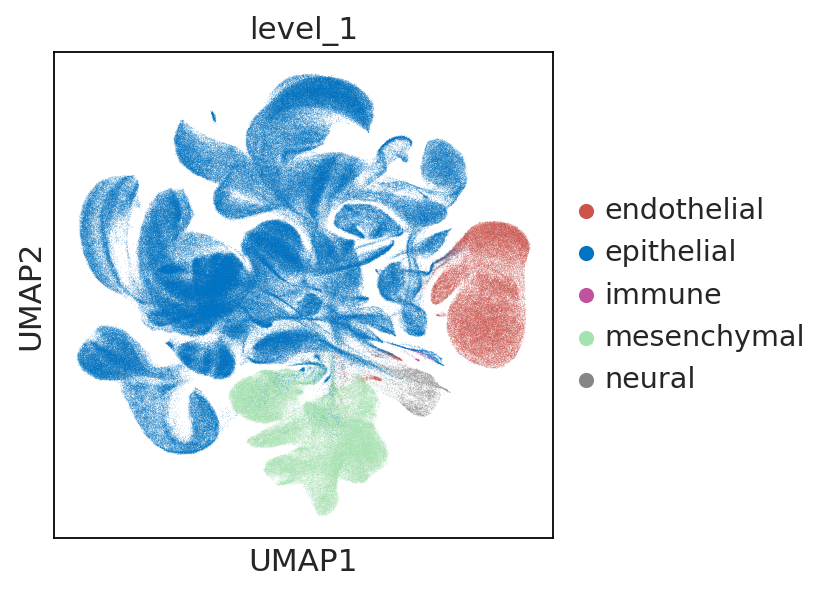

In [9]:
sc.pl.umap(adata_latent, 
           color = ['level_1'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


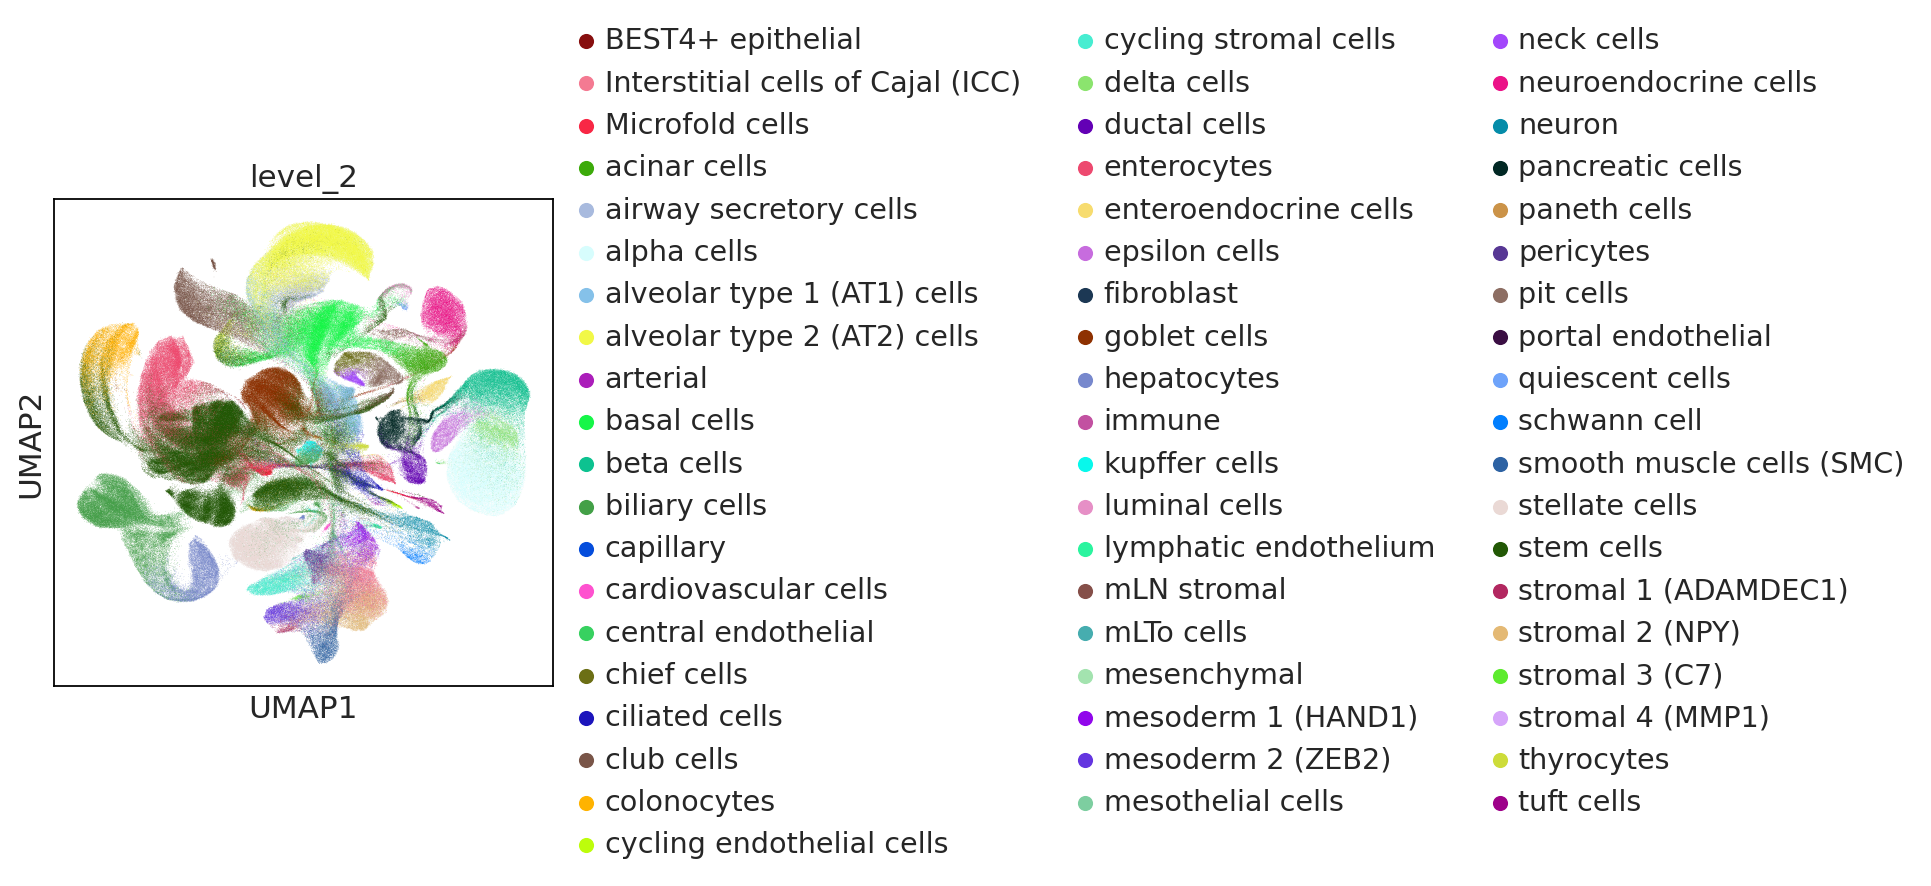

In [10]:
sc.pl.umap(adata_latent, 
           color = ['level_2'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


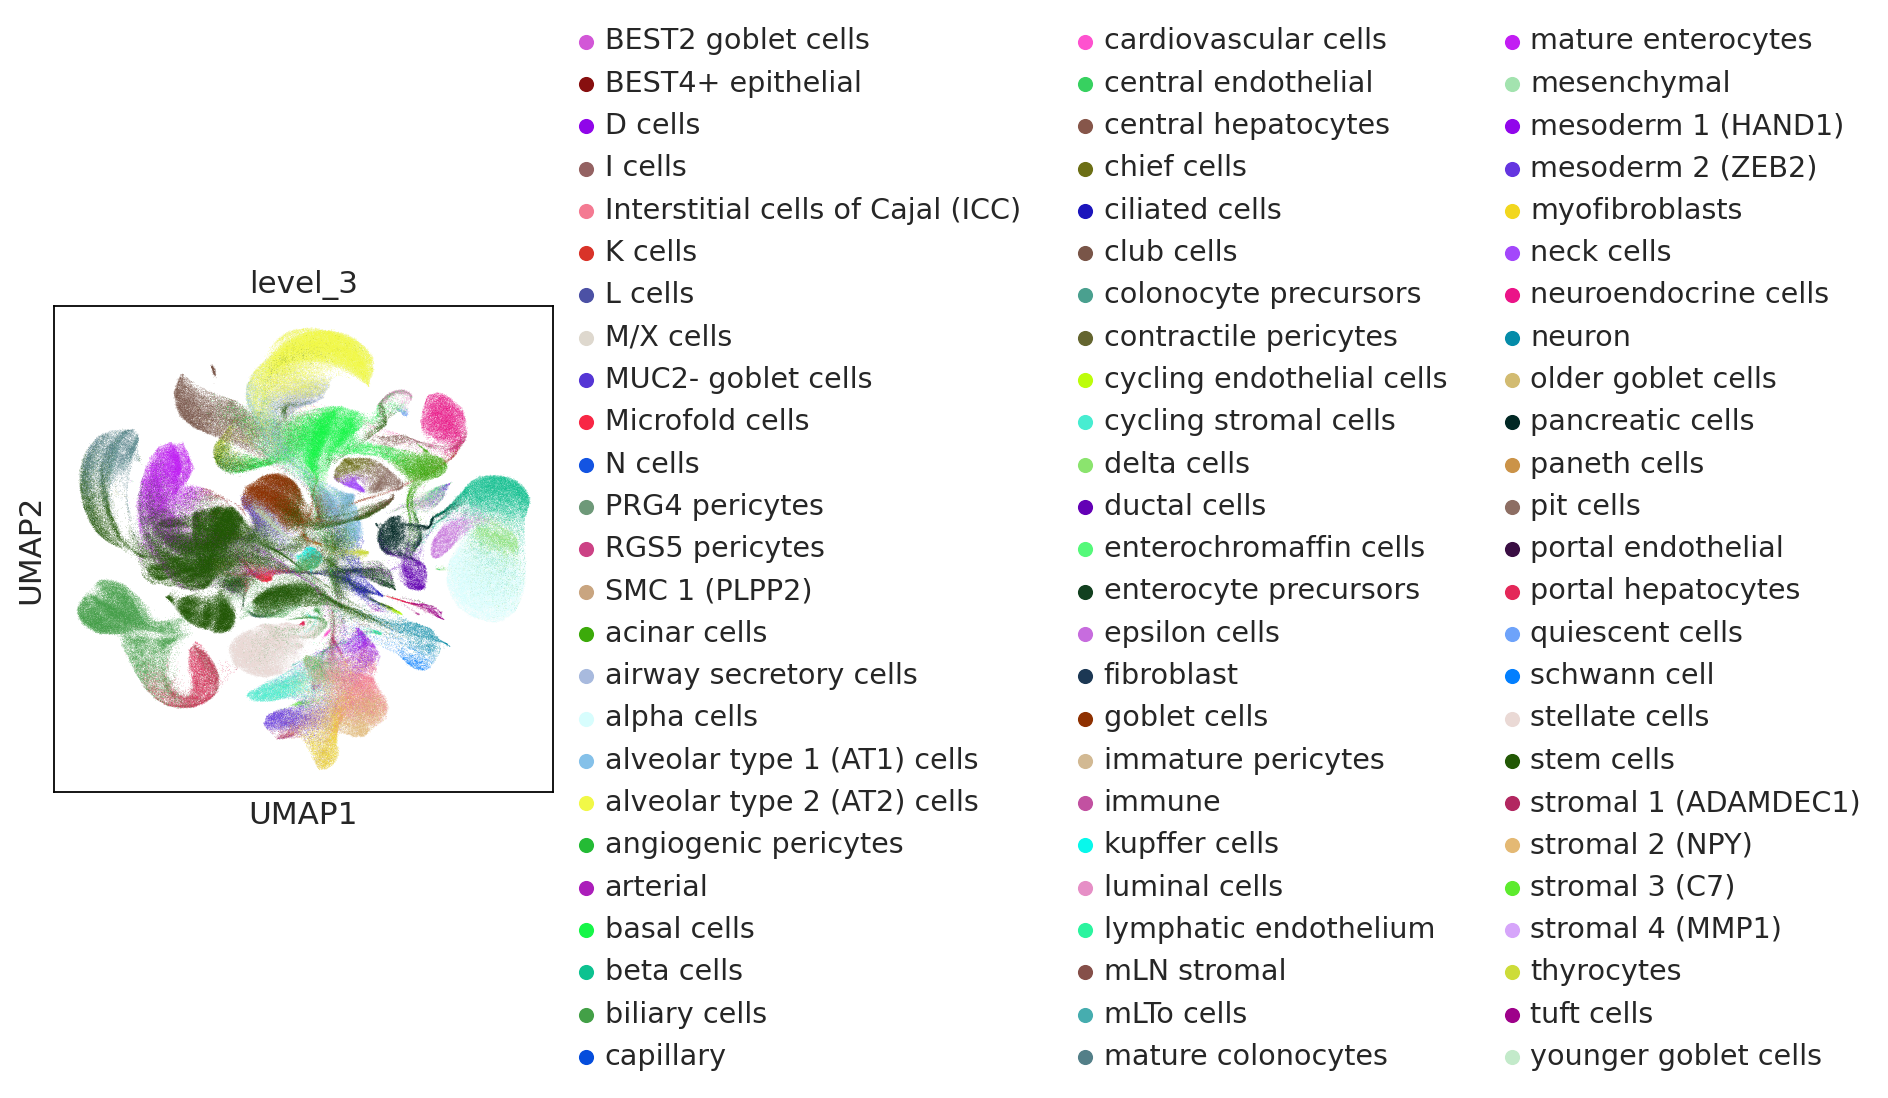

In [11]:
sc.pl.umap(adata_latent, 
           color = [ 'level_3'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


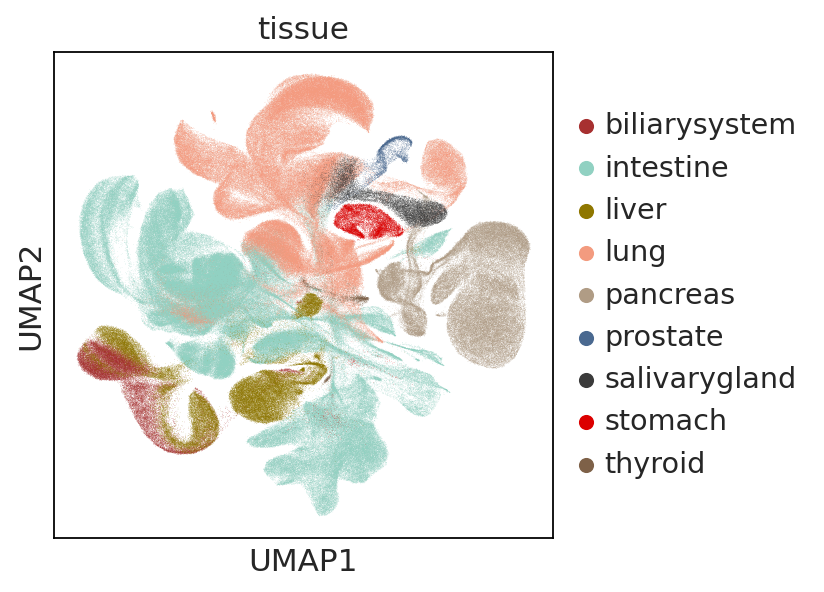

In [12]:
sc.pl.umap(adata_latent, 
           color = ['tissue'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


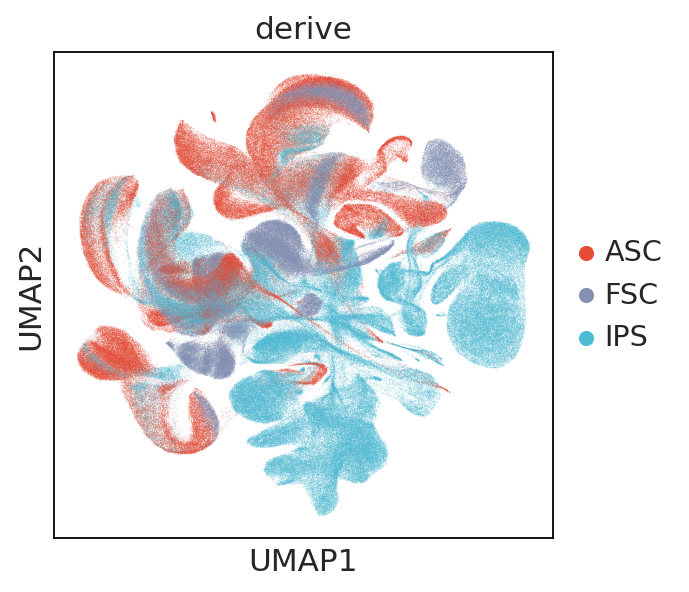

In [13]:
sc.pl.umap(adata_latent, 
           color = ['derive'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


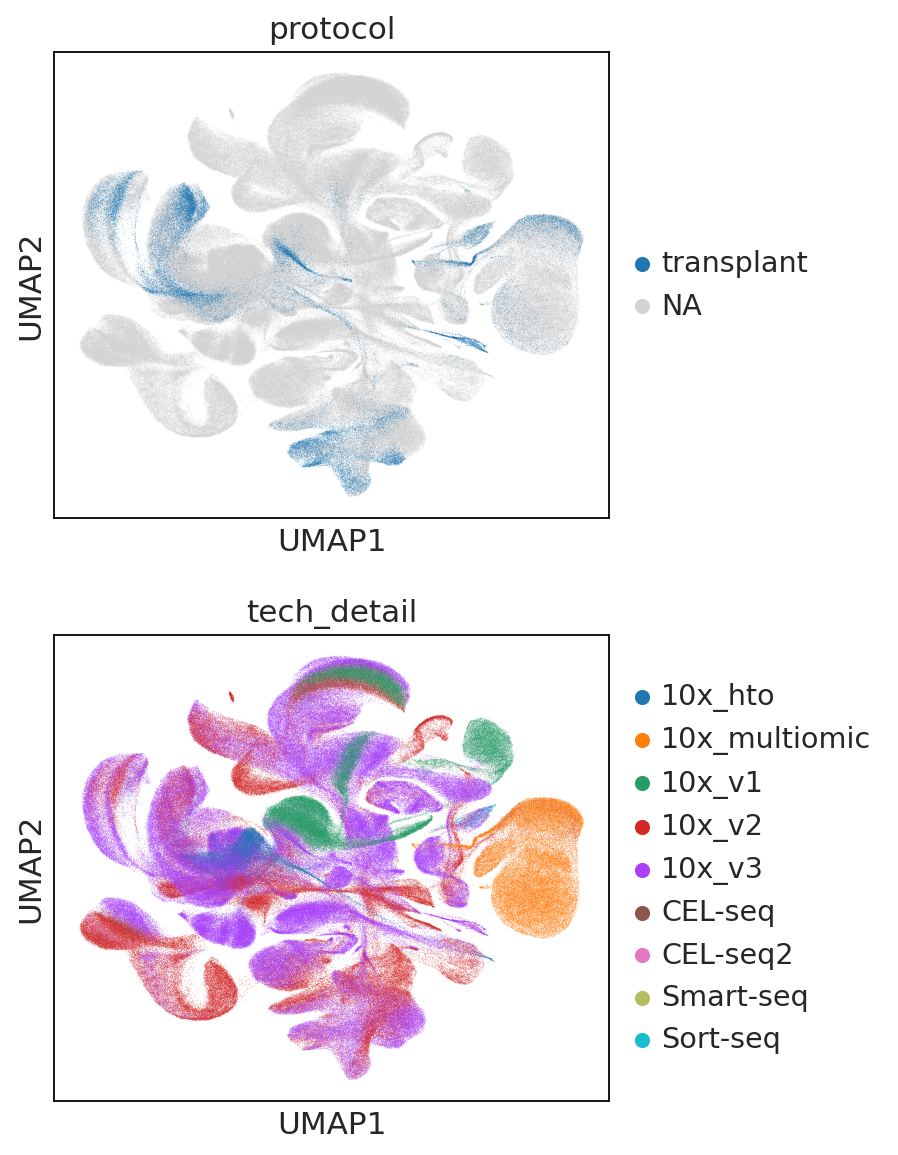

In [14]:
sc.pl.umap(adata_latent, 
           color = ['protocol','tech_detail'],
           ncols = 1
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


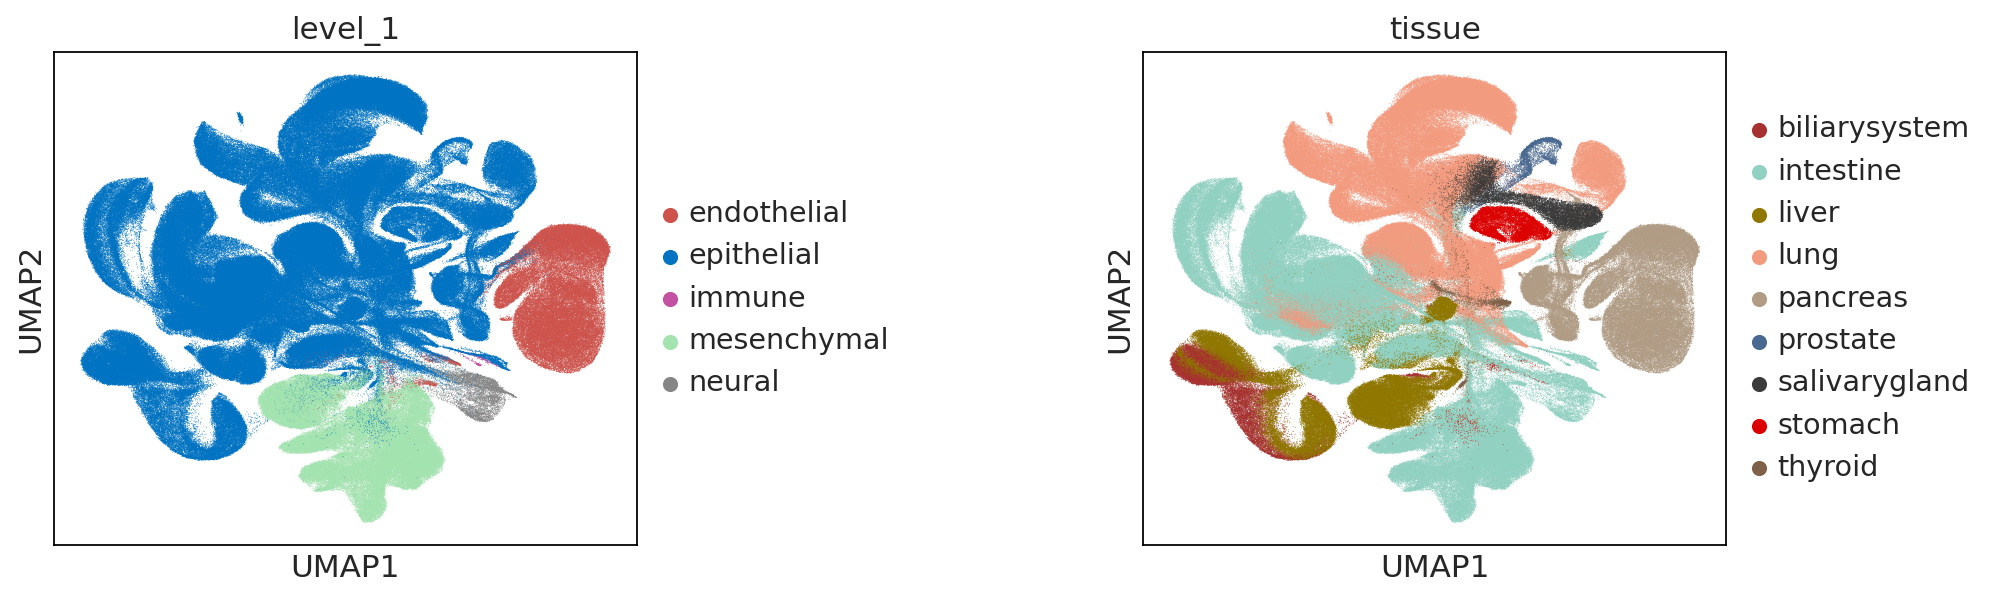

In [15]:
sc.pl.umap(adata_latent, 
           color = ['level_1', 'tissue'],
           ncols = 2, wspace = 0.7, size = 0.5
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


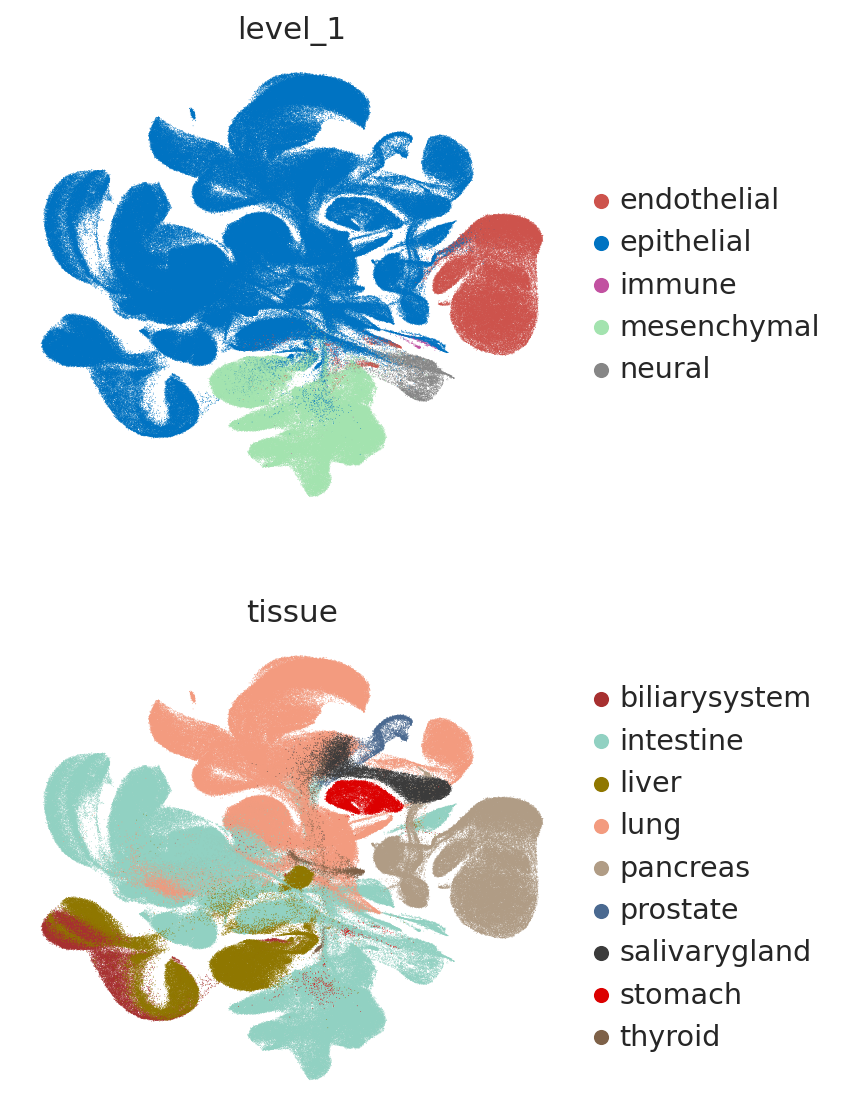

In [16]:
sc.pl.umap(adata_latent, 
           color = ['level_1', 'tissue'],
           ncols = 1, wspace = 0.2, size = 0.5,frameon=False,
#            save='organoid_atlas_ann_level_1_tissue_noframe.png'
          )

### Query COPD data 

In [17]:
adatas = []

status_dict = {"SCNPO1":"Healthy", "SCBO1":"Healthy", "SCNPO2":"COPD", "SCBO2":"COPD"}
derive_dict = {"SCNPO1":"nasopharyngeal", "SCBO1":"bronchial", 
               "SCNPO2":"nasopharyngeal", "SCBO2":"bronchial"}


for S in ['GSM5628936_SCNPO2', 'GSM5628935_SCNPO1','GSM5628938_SCBO2','GSM5628937_SCBO1']:
    print(S)
    print('initial cell count')
    adata = sc.read_10x_mtx('../../fetal_lung/COPD_GSE186017/', prefix = S+'-')
    print(adata.shape[0])
    adata.obs['sample_id'] = S
    adata.obs['tissue'] = 'lung (query)' 
    adata.obs['status'] = status_dict[re.sub('(.*)_(.*)','\\2',S)]
    adata.obs['status_fine'] = status_dict[re.sub('(.*)_(.*)','\\2',S)] + ' ' + derive_dict[re.sub('(.*)_(.*)','\\2',S)] + ' (query)'

    adata.obs_names = adata.obs_names + '_' + S
    # pre-processing done as per the publication
    adata.var["mito"] = adata.var_names.str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)
    sc.pp.filter_cells(adata, min_genes =200)
    sc.pp.filter_genes(adata, min_cells = 3)
    adata = adata[adata.obs.pct_counts_mito < 20]
    print("cells left after pre-processing")
    print(adata.shape[0])
    adatas.append(adata)
    

GSM5628936_SCNPO2
initial cell count
3700
cells left after pre-processing
3611
GSM5628935_SCNPO1
initial cell count
4050
cells left after pre-processing
3974
GSM5628938_SCBO2
initial cell count
7720
cells left after pre-processing
7652
GSM5628937_SCBO1
initial cell count
4846
cells left after pre-processing
4640


In [18]:
adata = ad.concat(adatas)

In [19]:
adata.obs

sample_id        tissue  \
AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2  GSM5628936_SCNPO2  lung (query)   
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2  GSM5628936_SCNPO2  lung (query)   
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2  GSM5628936_SCNPO2  lung (query)   
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2  GSM5628936_SCNPO2  lung (query)   
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2  GSM5628936_SCNPO2  lung (query)   
...                                                 ...           ...   
TTTGGTTGTCCCGGTA-1_GSM5628937_SCBO1    GSM5628937_SCBO1  lung (query)   
TTTGGTTGTGCGTGCT-1_GSM5628937_SCBO1    GSM5628937_SCBO1  lung (query)   
TTTGTTGCAACGTTAC-1_GSM5628937_SCBO1    GSM5628937_SCBO1  lung (query)   
TTTGTTGCAAGACCGA-1_GSM5628937_SCBO1    GSM5628937_SCBO1  lung (query)   
TTTGTTGCACGTACTA-1_GSM5628937_SCBO1    GSM5628937_SCBO1  lung (query)   

                                       status                  status_fine  \
AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2     COPD  COPD nasopharyngeal (query)   
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2     COPD  COPD nasopharyngeal (query)   
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2     COPD  COPD nasopharyngeal (query)   
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2     COPD  COPD nasopharyngeal (query)   
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2     COPD  COPD nasopharyngeal (query)   
...                                       ...                          ...   
TTTGGTTGTCCCGGTA-1_GSM5628937_SCBO1   Healthy    Healthy bronchial (query)   
TTTGGTTGTGCGTGCT-1_GSM5628937_SCBO1   Healthy    Healthy bronchial (query)   
TTTGTTGCAACGTTAC-1_GSM5628937_SCBO1   Healthy    Healthy bronchial (query)   
TTTGTTGCAAGACCGA-1_GSM5628937_SCBO1   Healthy    Healthy bronchial (query)   
TTTGTTGCACGTACTA-1_GSM5628937_SCBO1   Healthy    Healthy bronchial (query)   

                                      n_genes_by_counts  \
AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2               4775   
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2               4858   
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2               2751   
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2               3105   
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2               5652   
...                                                 ...   
TTTGGTTGTCCCGGTA-1_GSM5628937_SCBO1                6488   
TTTGGTTGTGCGTGCT-1_GSM5628937_SCBO1                3515   
TTTGTTGCAACGTTAC-1_GSM5628937_SCBO1                6692   
TTTGTTGCAAGACCGA-1_GSM5628937_SCBO1                5732   
TTTGTTGCACGTACTA-1_GSM5628937_SCBO1                 316   

                                      log1p_n_genes_by_counts  total_counts  \
AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2                 8.471359       25423.0   
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2                 8.488588       24323.0   
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2                 7.920083       14173.0   
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2                 8.041091       11276.0   
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2                 8.639942       30586.0   
...                                                       ...           ...   
TTTGGTTGTCCCGGTA-1_GSM5628937_SCBO1                  8.777864       27404.0   
TTTGGTTGTGCGTGCT-1_GSM5628937_SCBO1                  8.165079       15275.0   
TTTGTTGCAACGTTAC-1_GSM5628937_SCBO1                  8.808817       39753.0   
TTTGTTGCAAGACCGA-1_GSM5628937_SCBO1                  8.653994       40860.0   
TTTGTTGCACGTACTA-1_GSM5628937_SCBO1                  5.758902         566.0   

                                      log1p_total_counts  \
AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2           10.143449   
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2           10.099218   
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2            9.559165   
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2            9.330521   
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2           10.328330   
...                                                  ...   
TTTGGTTGTCCCGGTA-1_GSM5628937_SCBO1            10.218481   
TTTGGTTGTGCGTGCT-1_GSM5628937_SCBO1             9.634038   
TTTGTTGCAACGTTAC-1_GSM5628937_SCBO

In [20]:
pd.crosstab(adata.obs.tissue, adata.obs.status)

status         COPD  Healthy
tissue                      
lung (query)  11263     8614

In [21]:
ref_path_dir = '../../fetal_lung/Roche/new_20230705/gut_scpoli_model'

In [22]:
adata_ref = sc.read('../../fetal_lung/Roche/new_20230705/gut_scpoli_integration.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 806646 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [23]:
adata

AnnData object with n_obs × n_vars = 19877 × 20034
    obs: 'sample_id', 'tissue', 'status', 'status_fine', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes'

In [24]:
adata.X[1:10,1:10].toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 2., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
scpoli_model = scarches.models.scpoli.scPoli.load(ref_path_dir, adata_ref)

AnnData object with n_obs × n_vars = 806646 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'
Embedding dictionary:
 	Num conditions: 218
 	Embeddi

In [26]:
adata.obs['level_1'] = 'na'
adata.obs['level_2'] = 'na'

In [27]:
import anndata
from anndata import AnnData
from scipy.sparse import csr_matrix


genes_to_add = adata_ref.var_names.difference(adata.var_names)
needs_padding = len(genes_to_add) > 0
if needs_padding:
    adata_padding = AnnData(
        csr_matrix(np.zeros((adata.n_obs, len(genes_to_add))))
    )
    adata_padding.var_names = genes_to_add
    adata_padding.obs_names = adata.obs_names
    # Concatenate object
    adata_out = anndata.concat(
        [adata[:,adata.var_names.intersection(adata_ref.var_names)], adata_padding],
        axis=1,
        join="outer",
        index_unique=None,
        merge="unique",
    )
if not adata_ref.var_names.equals(adata_out.var_names):
    adata_out._inplace_subset_var(adata_ref.var_names)

In [28]:
adata = adata_out.copy()

In [29]:
print(adata_ref.shape)
print(adata.shape)

(806646, 2000)
(19877, 2000)


In [30]:
# adata_ = adata.copy()
# adata_.X = adata_.X.todense()

In [31]:
adata_ref.var_names

Index(['ADAMTS9-AS2', 'BHLHE40-AS1', 'CARMN', 'CASC15', 'CASC19', 'CDKN2B-AS1',
       'CRNDE', 'CYTOR', 'DNM3OS', 'DRAIC',
       ...
       'ZG16', 'ZG16B', 'ZMAT3', 'ZNF165', 'ZNF292', 'ZNF385D', 'ZNF503',
       'ZNF703', 'ZNF804A', 'ZWINT'],
      dtype='object', length=2000)

In [32]:
adata_ref.X[1:10,1:10].toarray()

array([[0.  , 0.  , 0.  , 1.48, 0.  , 0.  , 1.48, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.53, 0.  , 0.53, 0.88, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 2.15, 0.  , 0.67, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 2.04, 0.  , 0.56, 1.7 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.52, 0.  , 1.38, 1.03, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 1.21, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.59, 0.  , 0.  , 1.59, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.96, 0.  , 1.11, 1.11, 0.  , 0.  ]],
      dtype=float32)

In [33]:
adata.var_names

Index(['ADAMTS9-AS2', 'BHLHE40-AS1', 'CARMN', 'CASC15', 'CASC19', 'CDKN2B-AS1',
       'CRNDE', 'CYTOR', 'DNM3OS', 'DRAIC',
       ...
       'ZG16', 'ZG16B', 'ZMAT3', 'ZNF165', 'ZNF292', 'ZNF385D', 'ZNF503',
       'ZNF703', 'ZNF804A', 'ZWINT'],
      dtype='object', length=2000)

In [34]:
adata.layers['counts'] = adata.X.copy()

In [35]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [36]:
adata.X[1:10,1:10].toarray()

array([[0.  , 0.  , 0.  , 0.  , 0.  , 1.67, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.75, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.91, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.23, 0.  , 0.59, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.  , 0.  , 0.  ]])

In [37]:
adata.X = adata.X.astype(np.float32)

In [38]:
adata.obs['level_1'] = adata.obs.level_1.astype('category')
adata.obs['level_2'] = adata.obs.level_2.astype('category')

In [39]:
adata.X = adata.X.todense()

In [40]:
adata

AnnData object with n_obs × n_vars = 19877 × 2000
    obs: 'sample_id', 'tissue', 'status', 'status_fine', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'level_1', 'level_2'
    uns: 'log1p'
    layers: 'counts'

In [41]:
# keep only the COPD cells as healthy samples are in the reference

In [42]:
scpoli_query = scPoli.load_query_data(
        adata=adata,
        reference_model=scpoli_model,
        unknown_ct_names = ['na'],
        labeled_indices=[],
    )

Embedding dictionary:
 	Num conditions: 222
 	Embedding dim: 3
Encoder Architecture:
	Input Layer in, out and cond: 2000 898 3
	Mean/Var Layer in/out: 898 10
Decoder Architecture:
	First Layer in, out and cond:  10 898 3
	Output Layer in/out:  898 2000 



In [43]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_prototype_loss",
    "mode": "min",
    "threshold": 0,
    "patience": 20,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [44]:
scpoli_query.train(
    n_epochs=20,
    pretraining_epochs=4,
    early_stopping_kwargs=early_stopping_kwargs,
    eta=10,
    alpha_epoch_anneal=100
)

 |████----------------| 20.0%  - val_loss: 812.9299964905 - val_cvae_loss: 812.9299964905
Initializing unlabeled prototypes with Leiden-Clustering with an unknown number of clusters.


/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python

Leiden Clustering succesful. Found 27 clusters.
 |████████████████████| 100.0%  - val_loss: 780.5731430054 - val_cvae_loss: 780.5731430054 - val_prototype_loss: 0.0000000000 - val_unlabeled_loss: 0.0000000000


In [45]:
scpoli_query.model.eval()
# embd = scpoli_query.get_latent(
#         adata_ref.X,
#         adata_ref.obs.sample_id,
#         mean=True
#     )

# embd = sc.AnnData(embd)
# embd.obs_names = adata_ref.obs_names
# embd.obs = adata_ref.obs.copy()
# embd.obs['source'] = 'HEOA'

scpoli(
  (embedding): Embedding(222, 3, max_norm=1.0)
  (encoder): Encoder(
    (FC): Sequential(
      (L0): CondLayers(
        (expr_L): Linear(in_features=2000, out_features=898, bias=True)
        (cond_L): Linear(in_features=3, out_features=898, bias=False)
      )
      (N0): LayerNorm((898,), eps=1e-05, elementwise_affine=False)
      (A0): ReLU()
    )
    (mean_encoder): Linear(in_features=898, out_features=10, bias=True)
    (log_var_encoder): Linear(in_features=898, out_features=10, bias=True)
  )
  (decoder): Decoder(
    (FirstL): Sequential(
      (L0): CondLayers(
        (expr_L): Linear(in_features=10, out_features=898, bias=False)
        (cond_L): Linear(in_features=3, out_features=898, bias=False)
      )
      (N0): LayerNorm((898,), eps=1e-05, elementwise_affine=False)
      (A0): ReLU()
    )
    (HiddenL): Sequential()
    (mean_decoder): Sequential(
      (0): Linear(in_features=898, out_features=2000, bias=True)
      (1): Softmax(dim=-1)
    )
  )
)

In [46]:
adata = adata[adata.obs.status.isin(['COPD'])].copy()

In [47]:
adata.obs.status.value_counts()

status
COPD    11263
Name: count, dtype: int64

In [48]:
embd_query = scpoli_query.get_latent(
        adata.X,
        adata.obs.sample_id,
        mean=True
    )
embd_query = sc.AnnData(embd_query)
embd_query.obs_names = adata.obs_names
embd_query.obs = adata.obs.copy()
embd_query.obs['source'] = 'COPD (query)'

In [49]:
embd_query

AnnData object with n_obs × n_vars = 11263 × 10
    obs: 'sample_id', 'tissue', 'status', 'status_fine', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'level_1', 'level_2', 'source'

In [50]:
import anndata as ad
# embd = ad.concat((embd,embd_query), join = 'outer')

# adata_latent.obs['source'] = 'reference_organoid'
# embd = ad.concat((adata_latent,embd_query), join = 'outer')

import anndata as ad
import umap
import pickle

adata_latent.obs['source'] = 'HEOA'
# embd = ad.concat((adata_latent,embd_query), join = 'outer')

# model = umap.UMAP(n_neighbors=5, random_state=42, min_dist=0.5).fit(adata_latent.X)
model = pickle.load(open('umap_model.sav','rb'))
embd_query.obsm['X_umap'] = model.transform(embd_query.X)
embd = ad.concat((adata_latent,embd_query), join = 'outer')

In [51]:
pd.set_option("display.max_columns", None)

embd.obs

initial_size_spliced  \
AAACCTGAGCCACGTC-0                                 8713.0   
AAACCTGAGTATGACA-0                                 3851.0   
AAACCTGCACACATGT-0                                 3273.0   
AAACCTGCACGACGAA-0                                17792.0   
AAACCTGCAGCTGGCT-0                                27493.0   
...                                                   ...   
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2                   NaN   
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2                   NaN   
TTTGTTGTCACGGGCT-1_GSM5628938_SCBO2                   NaN   
TTTGTTGTCATAGGCT-1_GSM5628938_SCBO2                   NaN   
TTTGTTGTCATGAGAA-1_GSM5628938_SCBO2                   NaN   

                                     initial_size_unspliced  initial_size  \
AAACCTGAGCCACGTC-0                                   4669.0        8713.0   
AAACCTGAGTATGACA-0                                    760.0        3851.0   
AAACCTGCACACATGT-0                                     50.0        3273.0   
AAACCTGCACGACGAA-0                                   5242.0       17792.0   
AAACCTGCAGCTGGCT-0                                   9347.0       27493.0   
...                                                     ...           ...   
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2                     NaN           NaN   
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2                     NaN           NaN   
TTTGTTGTCACGGGCT-1_GSM5628938_SCBO2                     NaN           NaN   
TTTGTTGTCATAGGCT-1_GSM5628938_SCBO2                     NaN           NaN   
TTTGTTGTCATGAGAA-1_GSM5628938_SCBO2                     NaN           NaN   

                                     n_genes_by_counts  total_counts  \
AAACCTGAGCCACGTC-0                                3272       11476.0   
AAACCTGAGTATGACA-0                                1649        4783.0   
AAACCTGCACACATGT-0                                1424        4138.0   
AAACCTGCACGACGAA-0                                4520       22766.0   
AAACCTGCAGCTGGCT-0                                5846       35980.0   
...                                                ...           ...   
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2               2317        6162.0   
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2               1086        2042.0   
TTTGTTGTCACGGGCT-1_GSM5628938_SCBO2               2495        7101.0   
TTTGTTGTCATAGGCT-1_GSM5628938_SCBO2               2335        5674.0   
TTTGTTGTCATGAGAA-1_GSM5628938_SCBO2               2302        5645.0   

                                     total_counts_mt  pct_counts_mt  \
AAACCTGAGCCACGTC-0                            1075.0       9.367375   
AAACCTGAGTATGACA-0                             713.0      14.906962   
AAACCTGCACACATGT-0                               4.0       0.096665   
AAACCTGCACGACGAA-0                            1015.0       4.458403   
AAACCTGCAGCTGGCT-0                            2214.0       6.153419   
...                                              ...            ...   
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2              NaN            NaN   
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2              NaN            NaN   
TTTGTTGTCACGGGCT-1_GSM5628938_SCBO2              NaN            NaN   
TTTGTTGTCATAGGCT-1_GSM5628938_SCBO2              NaN            NaN   
TTTGTTGTCATGAGAA-1_GSM5628938_SCBO2              NaN            NaN   

                                     total_counts_ribo  pct_counts_ribo  \
AAACCTGAGCCACGTC-0                              3879.0        33.800976   
AAACCTGAGTATGACA-0                              1015.0        21.220991   
AAACCTGCACACATGT-0                              1382.0        33.397778   
AAACCTGCACGACGAA-0                              6835.0        30.022842   
AAACCTGCAGCTGGCT-0                             11453.0        31.831573   
...                                                ...              ...   
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2                NaN              NaN   
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2                NaN       

In [52]:
# sc.pp.neighbors(embd)
# sc.tl.umap(embd)

In [54]:
# set status_fine for in-reference Chan2022 to healthy
embd.obs.loc[embd.obs.publication.isin(['Chan_NatCommun_2022']),'status_fine'] = 'Healthy'

In [55]:
embd.obs.status_fine.value_counts()

status_fine
COPD bronchial (query)         7652
Healthy                        7649
COPD nasopharyngeal (query)    3611
Name: count, dtype: int64

In [63]:
col_map['COPD (query)'] = '#535a3b'
col_map['lung (query)'] = '#535a3b'
col_map['na'] = '#e5f6c6'
col_map['HEOA'] = 'lightgray'
col_map['COPD bronchial (query)'] = '#e8751a'
col_map['COPD nasopharyngeal (query)'] = '#8a1253'
col_map['Healthy'] = '#fda403'

In [60]:
embd.obs['tissue'] = embd.obs.tissue.astype('category')
embd.obs['status_fine'] = embd.obs.status_fine.astype('category')
embd.obs['source'] = embd.obs.source.astype('category')


In [64]:
embd.uns['level_1_colors'] = embd.obs.level_1.cat.categories.map(col_map).tolist()
embd.uns['level_2_colors'] = embd.obs.level_2.cat.categories.map(col_map).tolist()
embd.uns['level_3_colors'] = embd.obs.level_3.cat.categories.map(col_map).tolist()
embd.uns['tissue_colors'] = embd.obs.tissue.cat.categories.map(col_map).tolist()
embd.uns['derive_colors'] = embd.obs.derive.cat.categories.map(col_map).tolist()
embd.uns['source_colors'] = embd.obs.source.cat.categories.map(col_map).tolist()
embd.uns['status_fine_colors'] = embd.obs.status_fine.cat.categories.map(col_map).tolist()


/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


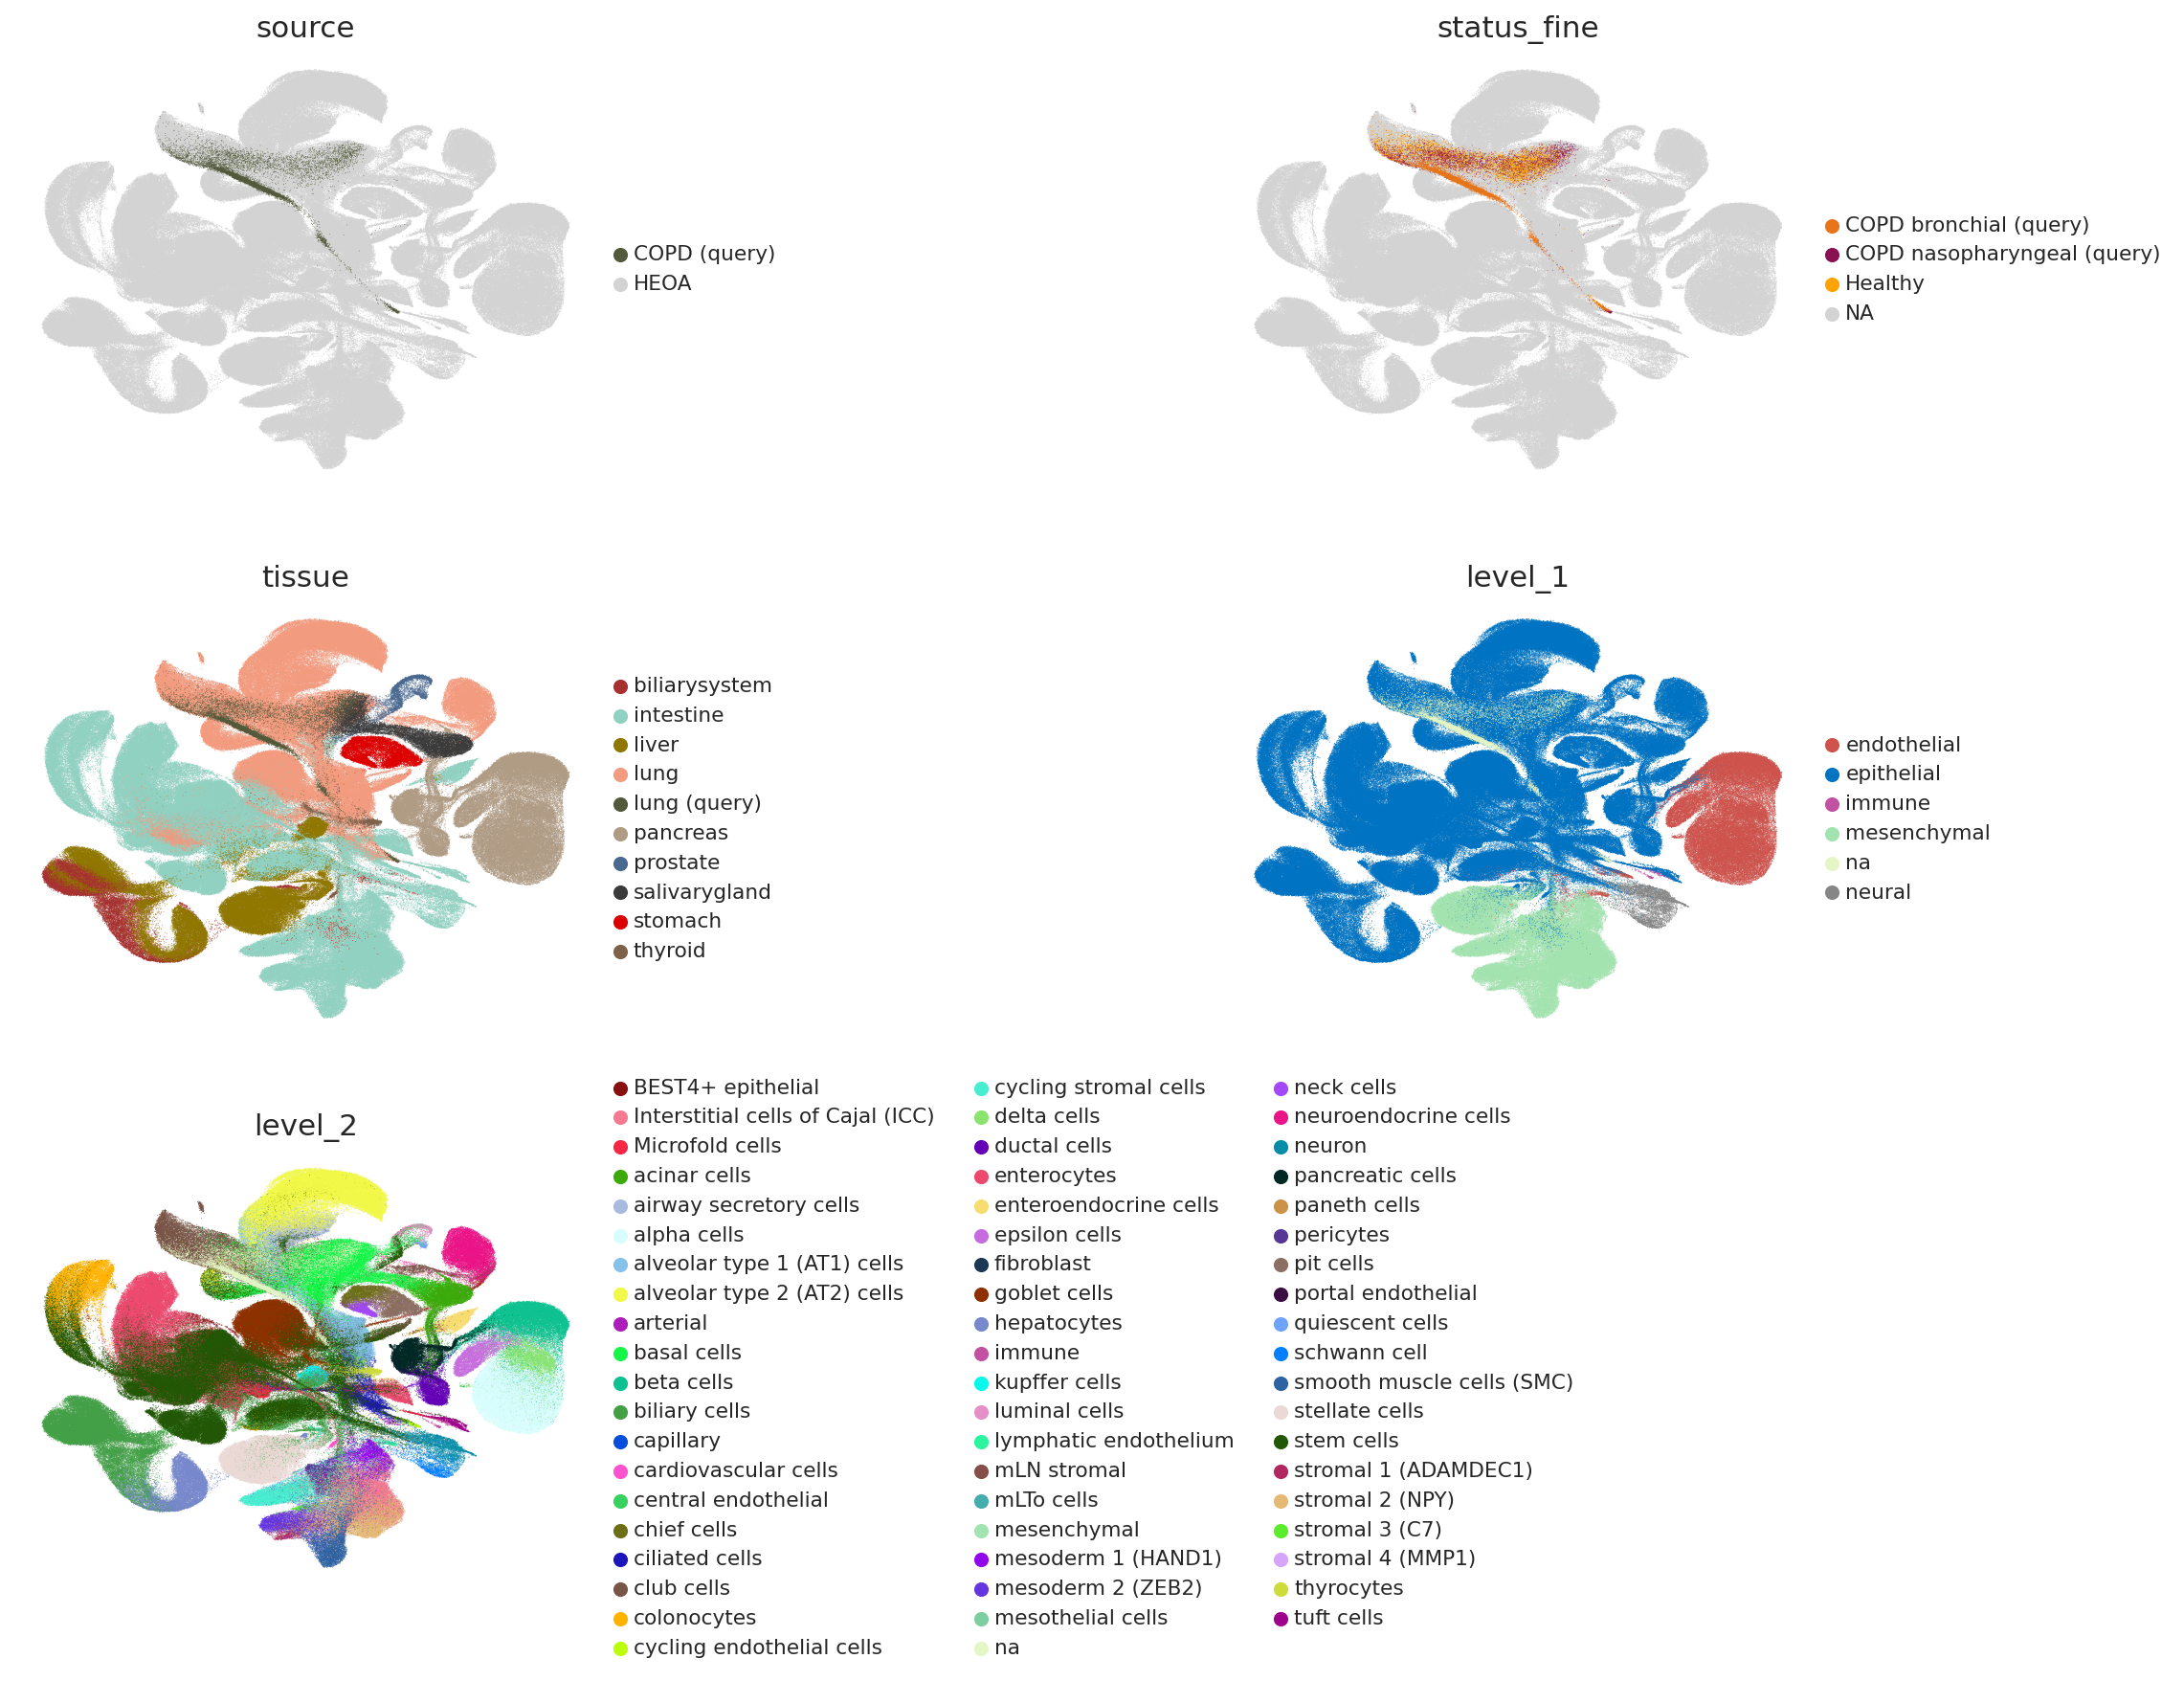

In [65]:
sc.pl.umap(embd, 
           color = ['source', 'status_fine','tissue', 'level_1','level_2'],
           ncols = 2, wspace = 0.9, legend_fontsize= 'x-small', size = 0.5, frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_120723.png'
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


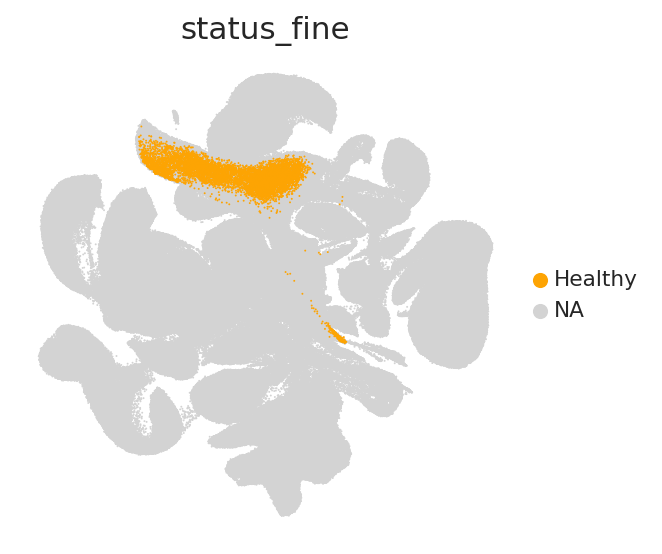

In [67]:
sc.pl.umap(embd, 
           color = ['status_fine',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
           groups = ['Healthy',], frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_status_healthy_120723.png'
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


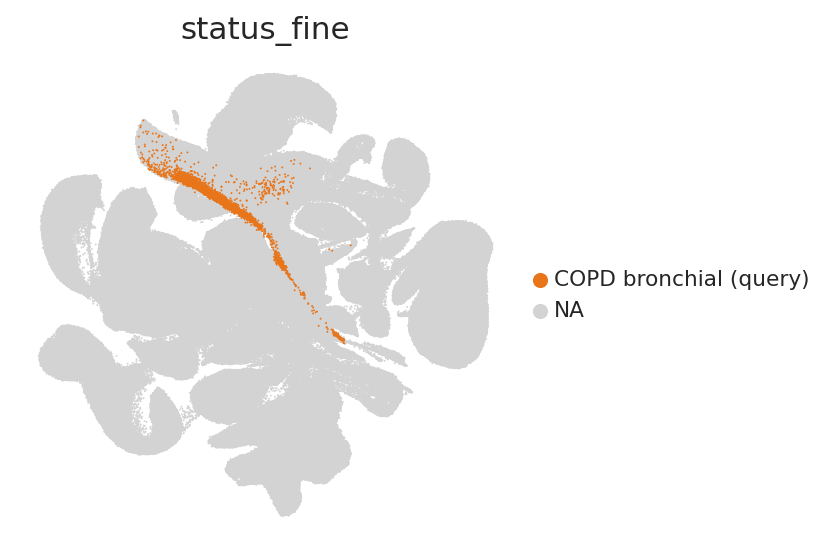

In [68]:
sc.pl.umap(embd, 
           color = ['status_fine',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
           groups = [ 'COPD bronchial (query)',], frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_status_healthy_120723_copdbron.png'
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


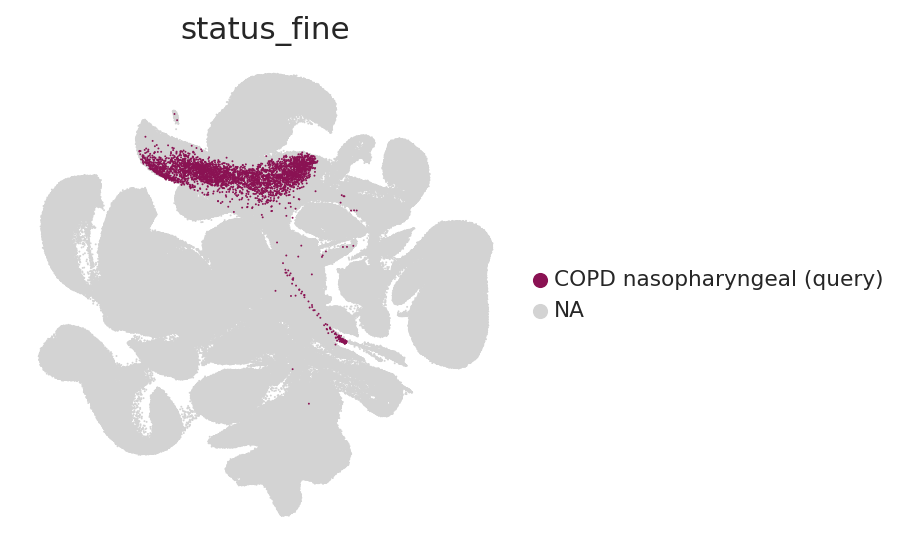

In [69]:
sc.pl.umap(embd, 
           color = ['status_fine',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
           groups = ['COPD nasopharyngeal (query)'], frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_status_healthy_120723_copdnasa.png'
          )

In [ ]:
# sc.pl.umap(embd, 
#            color = ['publication',],
#            ncols = 2, wspace = 0.9, legend_fontsize= 'x-small', size = 0.5,
#            groups = ['Chan_NatCommun_2022'],
# #            save = 'Chan_2022_COPD_map_allOrganoid_ann_tissue.png'
#           )

In [ ]:
# sc.pl.umap(embd[embd.obs.sample_id.isin(['Chan_NatCommun_2022_bronchial_organoids'])], 
#            color = ['publication',],
#            ncols = 2, wspace = 0.9, legend_fontsize= 'x-small', size = 0.5,
           
# #            save = 'Chan_2022_COPD_map_allOrganoid_ann_tissue.png'
#           )

In [ ]:
# sc.pl.umap(embd[embd.obs.sample_id.isin(['Chan_NatCommun_2022_nasopharyngeal_organoids'])], 
#            color = ['publication',],
#            ncols = 2, wspace = 0.9, legend_fontsize= 'x-small', size = 0.5,
          
# #            save = 'Chan_2022_COPD_map_allOrganoid_ann_tissue.png'
#           )

In [ ]:
# sc.pl.umap(embd, 
#            color = ['status',],
#            ncols = 2, wspace = 0.9, legend_fontsize= 'x-small', size = 0.5,
#            save = 'Chan_2022_COPD_map_allOrganoid_ann_status.png'
#           )

In [70]:
import pynndescent
import numba

hcca_embd = embd[embd.obs.source.isin(['HEOA'])].copy()
query_emb = embd[embd.obs.source.isin(['COPD (query)'])].copy()


X_train = hcca_embd.X
ref_nn_index = pynndescent.NNDescent(X_train)
ref_nn_index.prepare()

ref_neighbors, ref_distances = ref_nn_index.query(query_emb.X)

# convert distances to affinities
stds = np.std(ref_distances, axis=1)
stds = (2.0 / stds) ** 2
stds = stds.reshape(-1, 1)
ref_distances_tilda = np.exp(-np.true_divide(ref_distances, stds))
weights = ref_distances_tilda / np.sum(ref_distances_tilda, axis=1, keepdims=True)


@numba.njit
def weighted_prediction(weights, ref_cats):
    """Get highest weight category."""
    N = len(weights)
    predictions = np.zeros((N,), dtype=ref_cats.dtype)
    uncertainty = np.zeros((N,))
    for i in range(N):
        obs_weights = weights[i]
        obs_cats = ref_cats[i]
        best_prob = 0
        for c in np.unique(obs_cats):
            cand_prob = np.sum(obs_weights[obs_cats == c])
            if cand_prob > best_prob:
                best_prob = cand_prob
                predictions[i] = c
                uncertainty[i] = max(1 - best_prob, 0)

    return predictions, uncertainty


# for each annotation level, get prediction and uncertainty
label_keys = ['level_1','level_2','level_3']
for l in label_keys:
    ref_cats = hcca_embd.obs[l].cat.codes.to_numpy()[ref_neighbors]
    p, u = weighted_prediction(weights, ref_cats)
    p = np.asarray(hcca_embd.obs[l].cat.categories)[p]
    query_emb.obs[l + "_pred"], query_emb.obs[l + "_uncertainty"] = p, u
    
    
uncertainty_threshold = 0.3
# for l in label_keys:
#     mask = query_emb.obs[l + "_uncertainty"] > uncertainty_threshold
#     print(f"{l}: {sum(mask)/len(mask)} unknown")
#     query_emb.obs[l + "_pred"].loc[mask] = "Unknown"

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


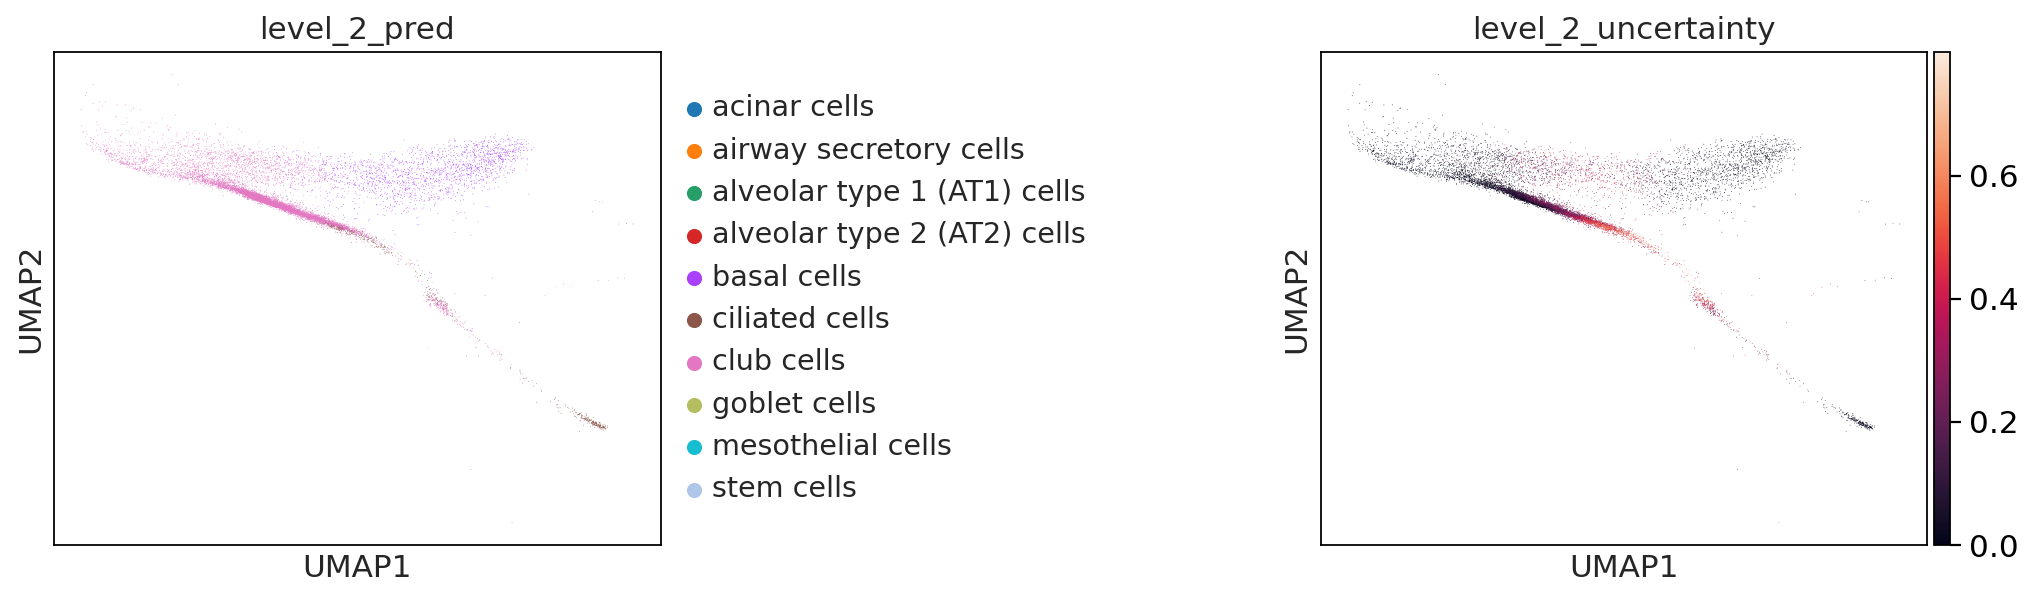

In [71]:
sc.pl.umap(query_emb, 
           color = ['level_2_pred',"level_2_uncertainty"],
           ncols = 2, wspace = 0.9, 
           #legend_fontsize= 'x-small',
           size = 0.5,
#            save = 'Chan_2022_COPD_map_allOrganoid_ann_status.png'
          )

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [6, 4]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

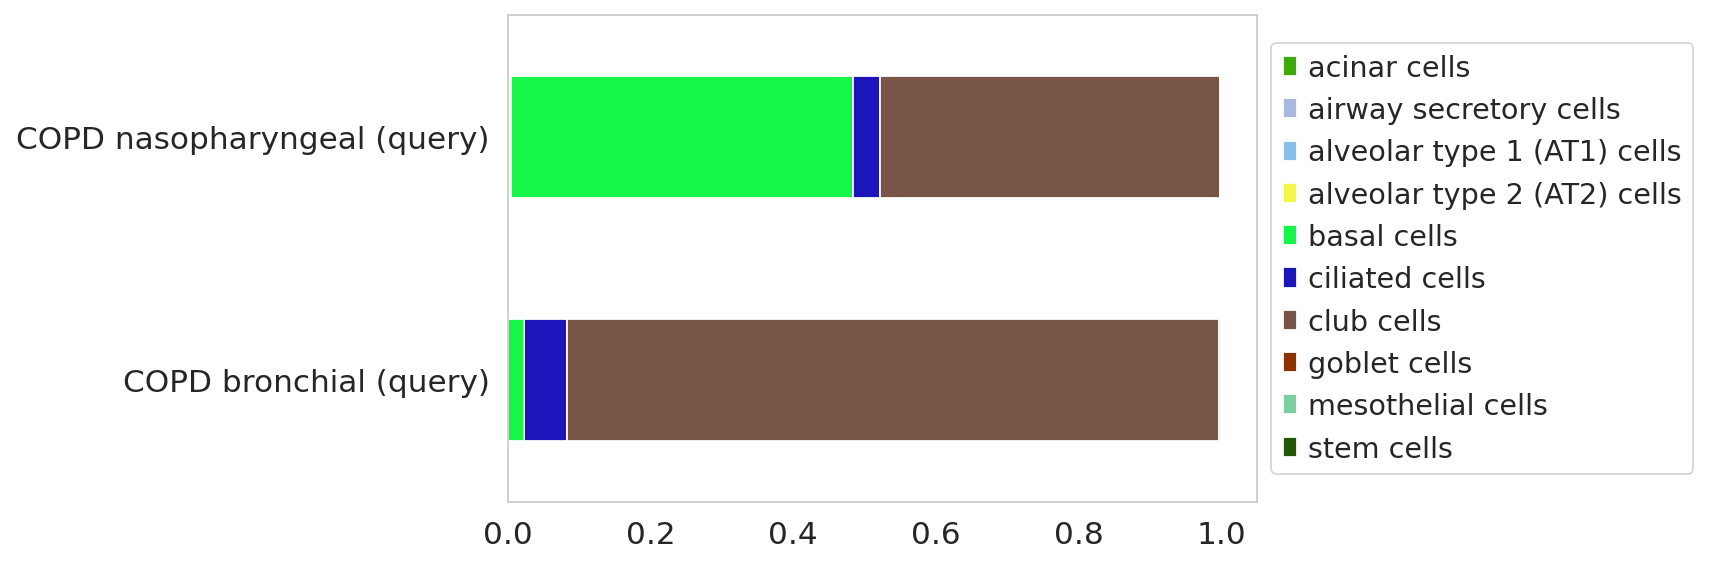

In [127]:
# COPD bronchial (query)         7652
# Healthy                        7649
# COPD nasopharyngeal (query)    3611

df = query_emb.obs.groupby(['status_fine','level_2_pred']).size()/adata.obs.groupby(['status_fine']).size()
df = df.unstack(fill_value=0)
order=['COPD bronchial (query)', 'COPD nasopharyngeal (query)',]
fig = df.reindex(order).plot.barh(stacked=True, 
                                  grid=False, 
                                  color=col_map,
                                  ylabel='',
                                 figsize=(6, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()

fig.savefig('figures/Chan2022COPD_map_allOrganoid_knn_pred_celltypes_120723.png', bbox_inches='tight')


In [74]:
# query_emb.obs

In [85]:
df.level_2_pred.cat.remove_unused_categories()

AAACCCAAGACCAAAT-1_GSM5628936_SCNPO2     club cells
AAACCCAAGGCTAACG-1_GSM5628936_SCNPO2    basal cells
AAACGCTAGCTAGATA-1_GSM5628936_SCNPO2     club cells
AAACGCTCAGATCCTA-1_GSM5628936_SCNPO2    basal cells
AAACGCTGTCCTGGTG-1_GSM5628936_SCNPO2     club cells
                                           ...     
TTTGTTGGTACAGAAT-1_GSM5628938_SCBO2      club cells
TTTGTTGGTTCACCGG-1_GSM5628938_SCBO2      club cells
TTTGTTGTCACGGGCT-1_GSM5628938_SCBO2      club cells
TTTGTTGTCATAGGCT-1_GSM5628938_SCBO2      club cells
TTTGTTGTCATGAGAA-1_GSM5628938_SCBO2      club cells
Name: level_2_pred, Length: 11260, dtype: category
Categories (9, object): ['airway secretory cells', 'alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells', 'basal cells', ..., 'club cells', 'goblet cells', 'mesothelial cells', 'stem cells']

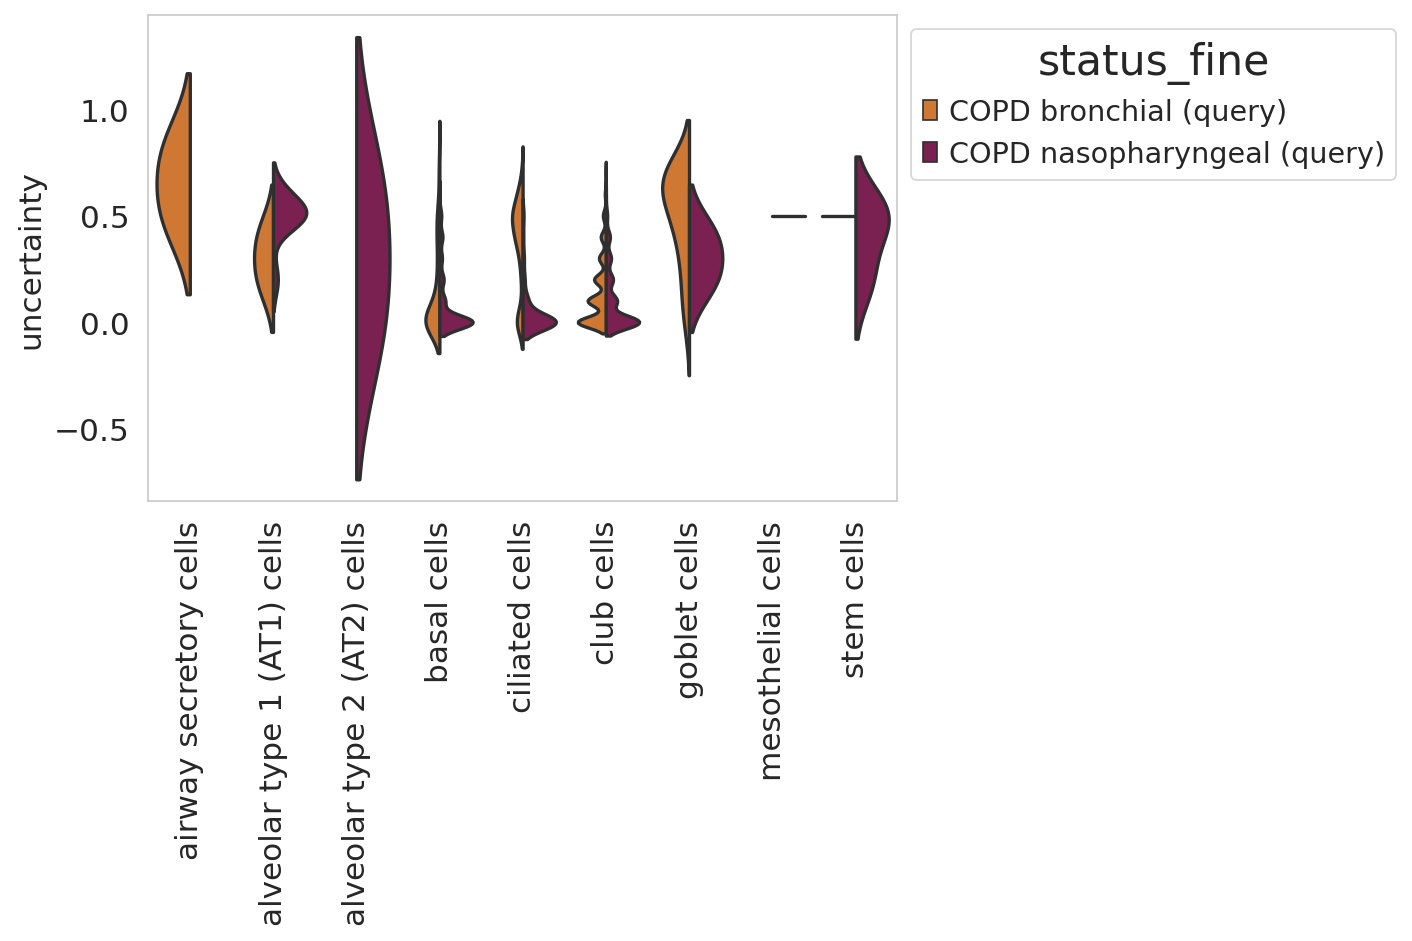

In [99]:
sns.set_style("whitegrid", {'axes.grid' : False})

my_pal = {k: col_map[k] for k in order}

fig, ax = plt.subplots(figsize=(6, 4))
df = query_emb.obs[~query_emb.obs.level_2_pred.isin(['acinar cells'])].copy()
df['level_2_pred'] = df.level_2_pred.cat.remove_unused_categories()
g = sns.violinplot(data=df, x="level_2_pred", y="level_2_uncertainty", 
                   hue="status_fine", split=True,  inner=None, palette=my_pal)
g.set(xlabel='', ylabel='uncertainty')
g.set_xticklabels(g.get_xticklabels(), rotation=90) 
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
fig = g.get_figure()
fig.savefig("figures/chan2022_copd_celltype_pred_uncertainty_120723.png", bbox_inches='tight')


In [102]:
# umap of each sample mapped to HEOA by cell type pred
emb = ad.concat([hcca_embd, query_emb], join = 'outer')

In [105]:
emb.uns['level_2_pred_colors'] = emb.obs.level_2_pred.cat.categories.map(col_map).tolist()

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


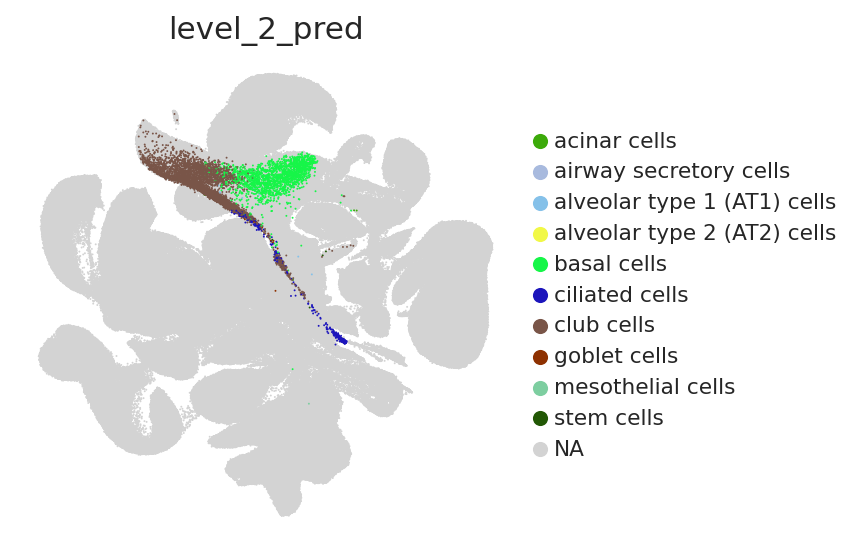

In [107]:
sc.pl.umap(emb, 
           color = ['level_2_pred',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
          
           frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_pred_celltype_120723.png'
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


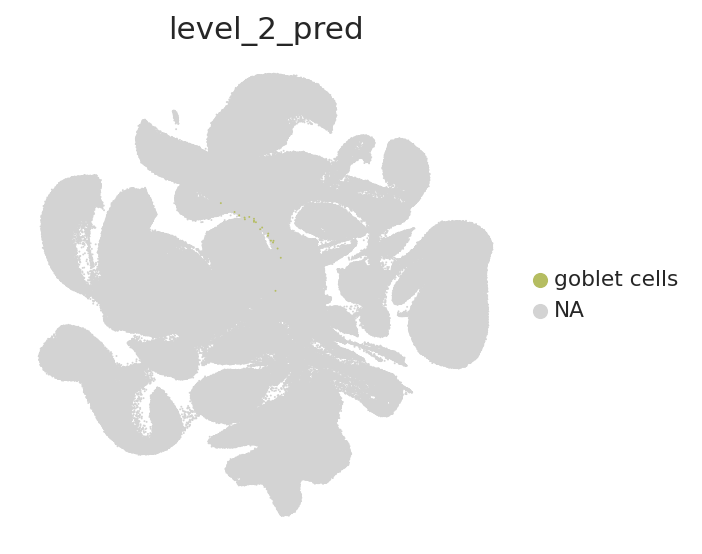

In [125]:
sc.pl.umap(emb, 
           color = ['level_2_pred',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
          groups = ['goblet cells'],
           frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_pred_celltype_120723_markGoblets.png'
          )

/home/theislab/l_zadeh/.conda/envs/scarches/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


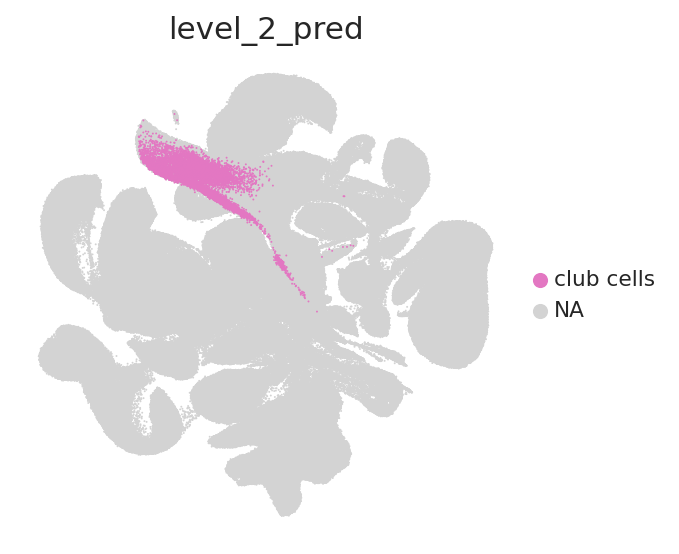

In [126]:
sc.pl.umap(emb, 
           color = ['level_2_pred',],
           ncols = 3, wspace = 0.9, legend_fontsize= 'x-small', size = 3,
          groups = ['club cells'],
           frameon=False,
           save = 'Chan_2022_COPD_map_allOrganoid_ann_pred_celltype_120723_markClubs.png'
          )

In [119]:
# barplot of cell composition for healthy and COPD
emb.obs['level_2_pred'] = emb.obs.level_2_pred.astype('str')
emb.obs.loc[emb.obs.status_fine.isin(['Healthy']),'level_2_pred'] = emb.obs.level_2[emb.obs.status_fine.isin(['Healthy'])]
emb.obs['level_2_pred'] = emb.obs.level_2_pred.astype('category')

In [122]:
col_map['nan'] = 'lightgray'

In [121]:
emb

AnnData object with n_obs × n_vars = 817909 × 10
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'source', 'status', 'status_fine', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'level_1_pred', 'level_1_uncertainty', 'level_2_pred', 'level_2_uncertainty', 'level_3_pred', 'level_3_uncertainty'
    uns: 'level_2_pred_colors'
    obsm: 'X_umap'

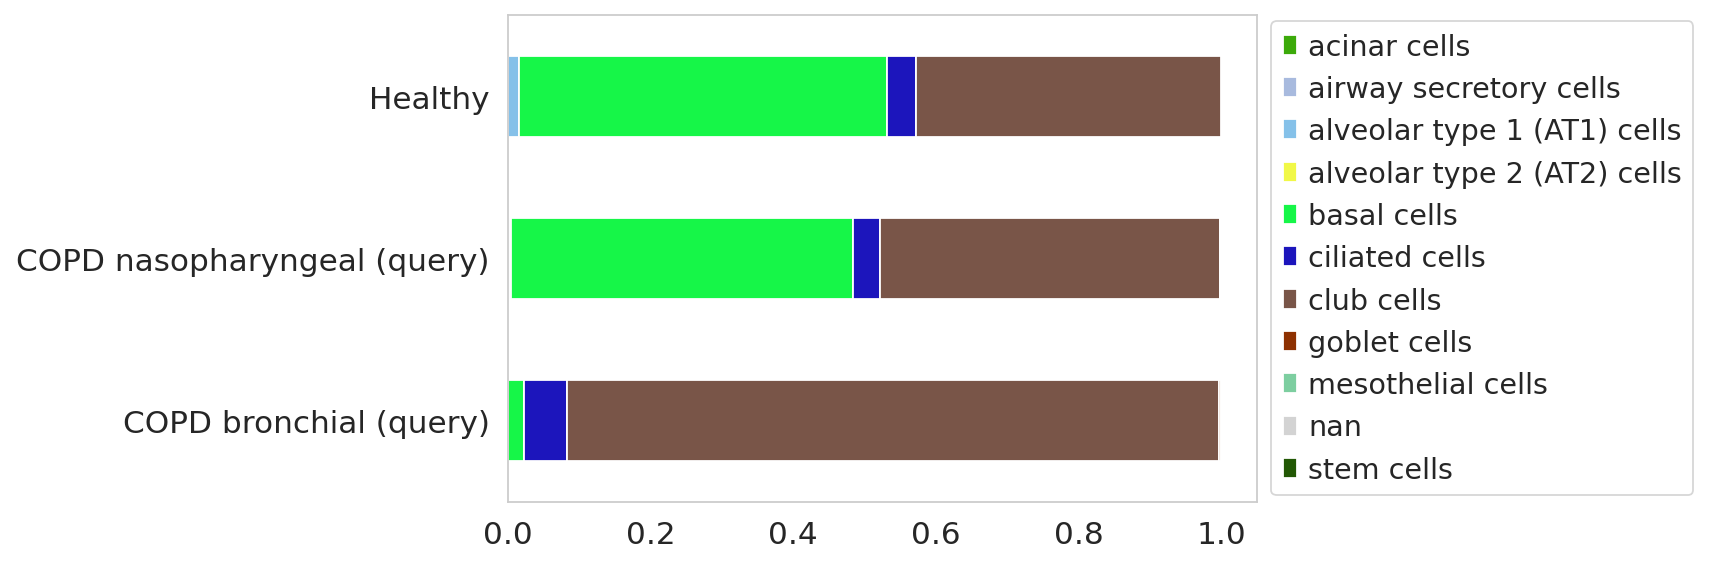

In [124]:
df = emb.obs.groupby(['status_fine','level_2_pred']).size()/emb.obs.groupby(['status_fine']).size()
df = df.unstack(fill_value=0)
order=['COPD bronchial (query)', 'COPD nasopharyngeal (query)','Healthy',]
fig = df.reindex(order).plot.barh(stacked=True, 
                                  grid=False, 
                                  color=col_map,
                                  ylabel='',
                                 figsize=(6, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()

fig.savefig('figures/Chan2022COPD_map_allOrganoid_knn_pred_celltypes_120723_healthyCOPD.png', bbox_inches='tight')


In [ ]:
results_dict = scpoli_query.classify(adata.X, adata.obs.sample_id)


In [ ]:
cell_type_key = ['level_1','level_2']

# for i in range(len(cell_type_key)):
#     preds = results_dict[cell_type_key[i]]["preds"]
#     results_dict[cell_type_key[i]]["uncert"]
#     classification_df = pd.DataFrame(
#         classification_report(
#             y_true=target_adata.obs[cell_type_key[i]],
#             y_pred=preds,
#             output_dict=True,
#         )
#     ).transpose()
# print(classification_df)

In [ ]:
#get label annotations
query_emb.obs['scpoli_cell_type_pred'] = results_dict['level_2']['preds'].tolist()
query_emb.obs['scpoli_cell_type_uncert'] = results_dict['level_2']['uncert'].tolist()


In [ ]:
sc.pl.umap(query_emb, 
           color = ['scpoli_cell_type_pred',"scpoli_cell_type_uncert"],
           ncols = 2, wspace = 0.9, 
           #legend_fontsize= 'x-small',
           size = 0.5,
#            save = 'Chan_2022_COPD_map_allOrganoid_ann_status.png'
          )

In [ ]:
query_emb.obs.scpoli_cell_type_uncert.describe()

In [ ]:
celltype_tissue_dict = adata_latent.obs[['tissue','level_2']].groupby('tissue')['level_2'].apply(lambda g: g.values.unique().tolist()).to_dict()

In [ ]:
query_emb.obs.groupby('sample_id')

In [ ]:
# compare false transfers by standard knn and scpoli classifier
celltype_tissue_dict['lung']

pd.DataFrame({
#knn
'knn': query_emb.obs.groupby('sample_id')[['level_2_pred','level_2_uncertainty']].apply(lambda x: np.mean(~x.level_2_pred.isin(celltype_tissue_dict['lung']) & (x.level_2_uncertainty < 0.3))),
#scpoli
'scpoli':query_emb.obs.groupby('sample_id')[['scpoli_cell_type_pred','scpoli_cell_type_uncert']].apply(lambda x: np.mean(~x.scpoli_cell_type_pred.isin(celltype_tissue_dict['lung']) & (x.scpoli_cell_type_uncert < 0.3)))
    
    
})

In [ ]:

fig, ax = plt.subplots(figsize=(20, 6))
g = sns.violinplot(data=df, x="scpoli_cell_type_pred", y="scpoli_cell_type_uncert", 
                   hue="tissue", split=True,  inner=None, aspect=1.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45) 
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
emb = ad.concat([hcca_embd, query_emb], axis = 0)

In [ ]:
emb

In [ ]:
emb.obs.columns

In [ ]:
query_emb.obs

In [ ]:
emb.obs.source.value_counts()

In [ ]:
emb.obs['level_2_uncertainty'] = np.nan
emb.obs.loc[emb.obs.source.isin(['lungOrganoid_Chan_2022_nature']),'level_2_uncertainty'] = query_emb.obs.level_2_uncertainty

In [ ]:
emb.obs['level_3_uncertainty'] = np.nan
emb.obs.loc[emb.obs.source.isin(['lungOrganoid_Chan_2022_nature']),'level_3_uncertainty'] = query_emb.obs.level_3_uncertainty

In [ ]:
import matplotlib as mpl

sc.pl.umap(emb, 
           color = ['tissue', 'level_2_uncertainty'], # 'level_3_uncertainty'
           ncols = 2, wspace = 0.6, legend_fontsize= 'x-small', size = 3,
           groups = ['lung_bronchial','lung_nasopharyngeal'], frameon=False,
           color_map = mpl.colormaps['cividis'],
#            save = 'Chan_2022_COPD_map_allOrganoid_ann_tissue.png'
          )